1. Вивести перші рядки таблиці за допомогою методу head

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#"

df_list = pd.read_html(url, thousands=".",encoding="utf-8", match="Коефіцієнт народжуваності в регіонах України")
df = df_list[0]
print("Перші рядки таблиці:")
df.head()


Перші рядки таблиці:


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",—,—
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",—


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [37]:
print("\nРозмірність таблиці (рядків, стовпців):")
df.shape


Розмірність таблиці (рядків, стовпців):


(28, 9)

Замініть у таблиці значення "—" на значення NaN

In [40]:
df.replace("—", np.nan, inplace=True)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,"23,0","20,6","16,0","13,0","7,3","12,6",NaN,NaN
1,Вінницька,"22,4","19,2","14,2","12,4","8,4","11,2","10,9","7,6"
2,Волинська,"24,7","25,0","17,9","15,3","11,2","14,8","14,1","10,1"
3,Дніпропетровська,"20,4","20,4","15,1","12,3","7,1","11,2","11,1","7,1"
4,Донецька,"27,1","21,4","14,0","10,9","6,1","9,8","8,2",NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [29]:
print("\nТипи стовпців:")
df.dtypes


Типи стовпців:


Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

Замініть типи нечислових колонок на числові

In [43]:
df_numeric = df.applymap(lambda x: str(x).replace(",", "."))

numeric_columns = ["1950", "1960", "1970", "2014", "2019"]
df_numeric[numeric_columns] = df_numeric[numeric_columns].apply(pd.to_numeric, errors='coerce')

print("\nDataFrame зі зміненими числовими значеннями:")
df_numeric
print("\nТипи стовпців:")
df_numeric.dtypes



DataFrame зі зміненими числовими значеннями:

Типи стовпців:


Регіон     object
1950      float64
1960      float64
1970      float64
1990       object
2000       object
2012       object
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [47]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("\nЧастка пропусків в кожній колонці:")
missing_percentage


Частка пропусків в кожній колонці:


Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [48]:
df_numeric = df_numeric.iloc[:-1]
df_numeric

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [66]:
numeric_columns = df_numeric.columns[1:]
df_numeric[numeric_columns] = df_numeric[numeric_columns].astype(float).fillna(df_numeric[numeric_columns].mean())
df_numeric[numeric_columns] = df_numeric[numeric_columns].apply(lambda x: round(x, 1))

df_numeric

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [112]:
average_birth_rate_2019 = df_numeric['2019'].mean()
regions_above_average_2019 = df_numeric[df_numeric['2019'] > average_birth_rate_2019]['Регіон'].reset_index(drop=True)
print("\nСписок регіонів з народжуваністю у 2019 році вище середньої по Україні:")
print(regions_above_average_2019.to_string(index=False))


Список регіонів з народжуваністю у 2019 році вище середньої по Україні:
        Волинська
     Закарпатська
Івано-Франківська
        Львівська
          Одеська
       Рівненська
       Херсонська
      Чернівецька
             Київ


Знаходимо регіон з найвищою народжуваністю у 2014 році

In [113]:
region_with_highest_birth_rate_2014 = df_numeric[df_numeric['2014'] == df_numeric['2014'].max()]['Регіон'].reset_index(drop=True)
print("\nРегіон з найвищою народжуваністю у 2014 році:")
print(region_with_highest_birth_rate_2014.to_string(index=False))


Регіон з найвищою народжуваністю у 2014 році:
Рівненська


Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році

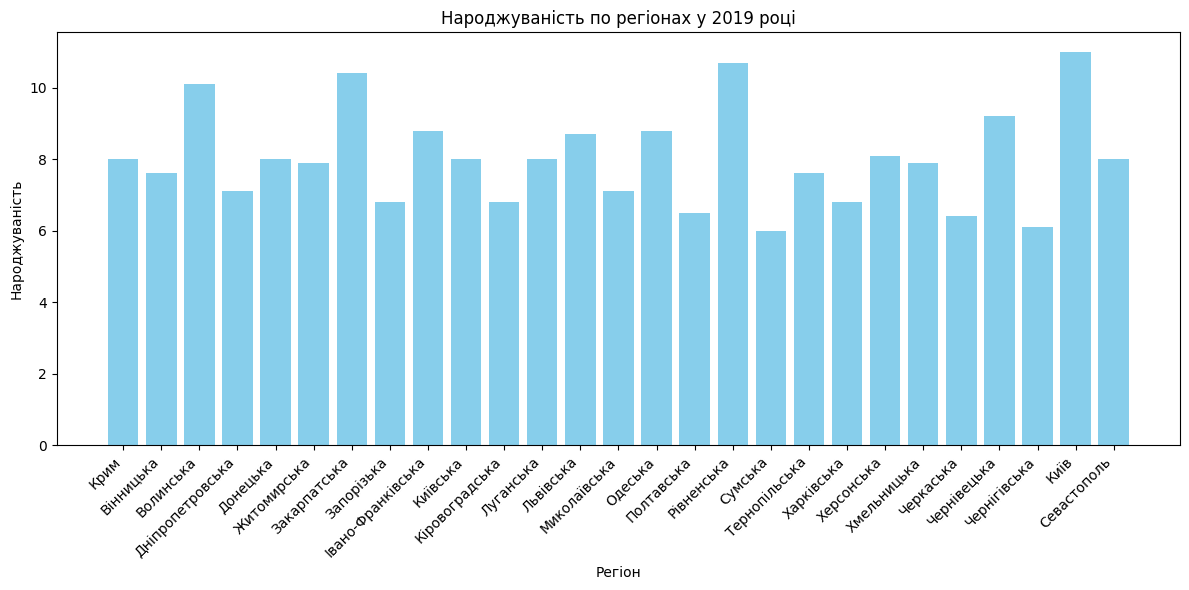

In [114]:
data_2019 = df_numeric[['Регіон', '2019']]
data_2019 = data_2019.dropna()
plt.figure(figsize=(12, 6))
plt.bar(data_2019['Регіон'], data_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

**Графік 1: Порівняння народжуваності у 1950 та 2019 роках**

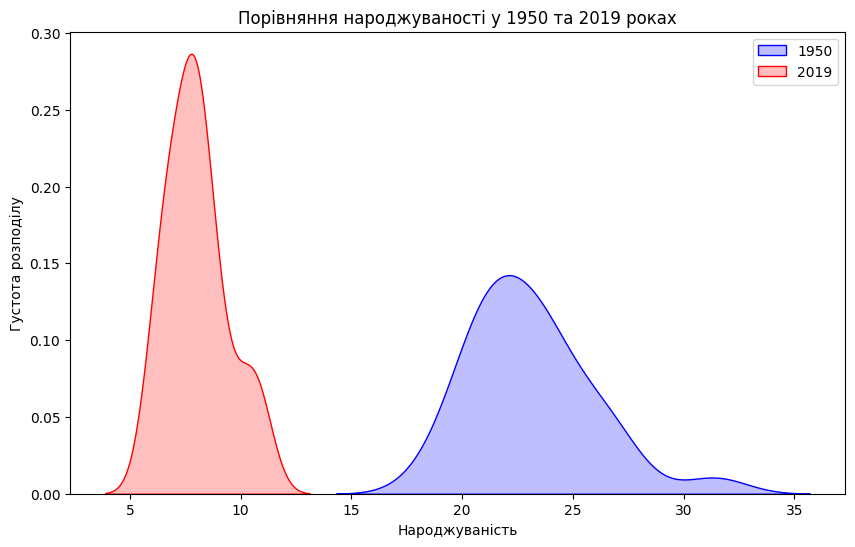

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Виводимо графіки всередині документа
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.kdeplot(df_numeric['1950'].dropna(), label='1950', color='blue', fill=True)
sns.kdeplot(df_numeric['2019'].dropna(), label='2019', color='red', fill=True)
plt.title('Порівняння народжуваності у 1950 та 2019 роках')
plt.xlabel('Народжуваність')
plt.ylabel('Густота розподілу')
plt.legend()
plt.show()


**Графік 2: Кореляція між роками**

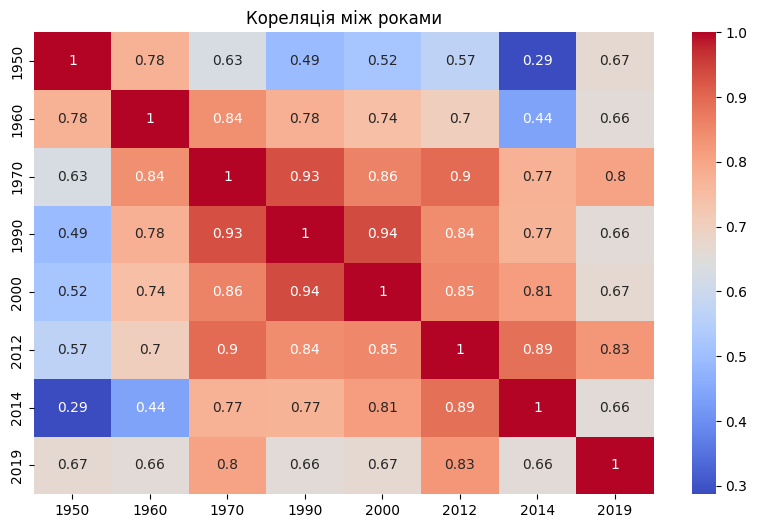

In [99]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляція між роками')
plt.show()

**Графік 3: Pairplot для деяких років**

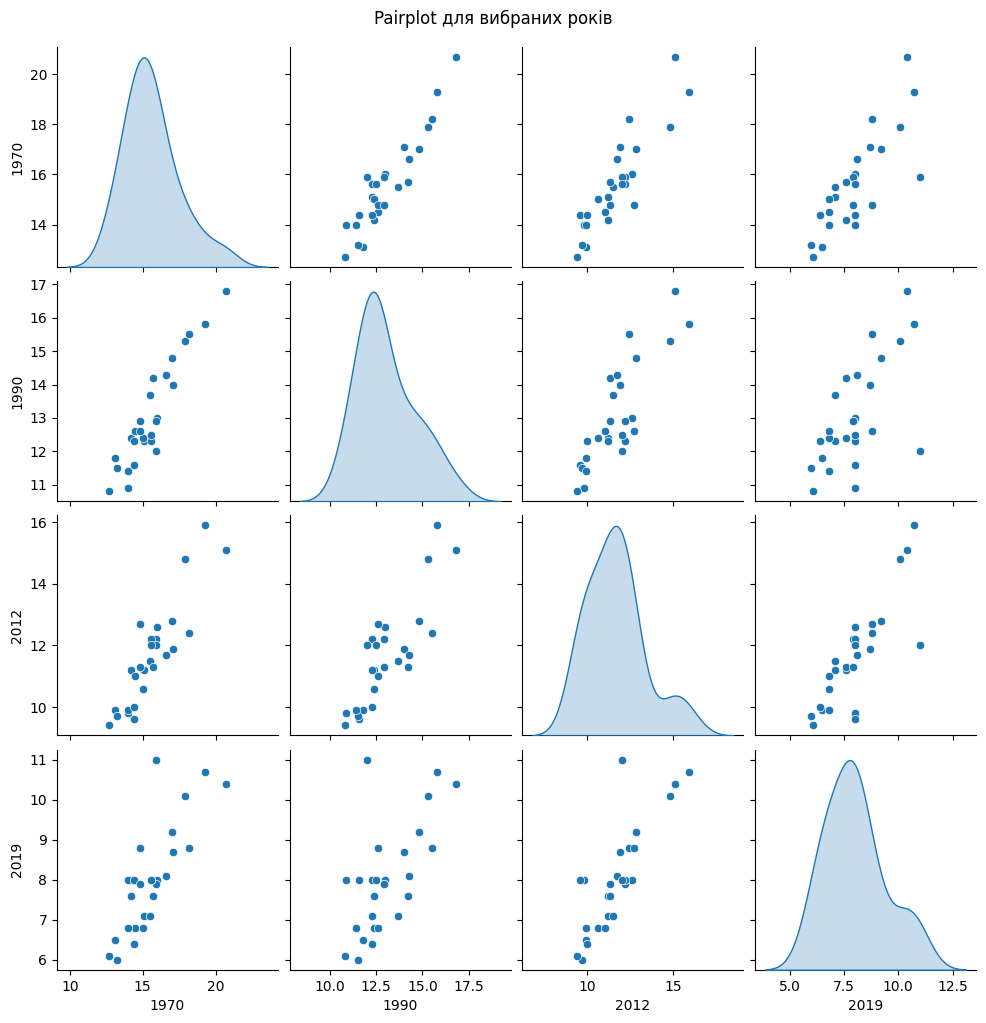

In [100]:
years_subset = ['1970', '1990', '2012', '2019']
sns.pairplot(df_numeric[years_subset].dropna(), diag_kind='kde')
plt.suptitle('Pairplot для вибраних років', y=1.02)
plt.show()

**Графік 4: Взаємозв'язок народжуваності у 2019 році та попередніх років**

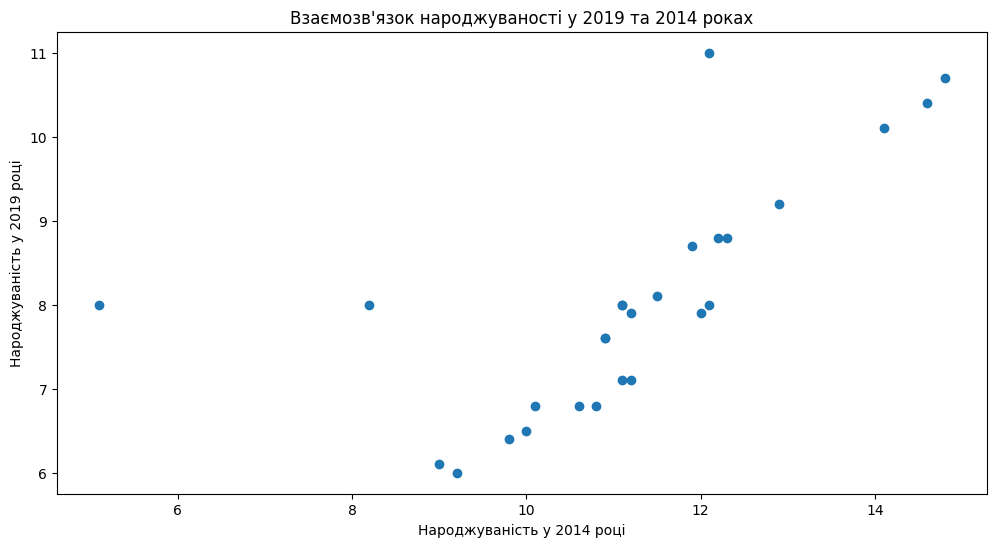

In [101]:
plt.figure(figsize=(12, 6))
plt.scatter(df_numeric['2014'], df_numeric['2019'])
plt.title('Взаємозв\'язок народжуваності у 2019 та 2014 роках')
plt.xlabel('Народжуваність у 2014 році')
plt.ylabel('Народжуваність у 2019 році')
plt.show()

**Графік 5: Народжуваність в Україні у різні роки**

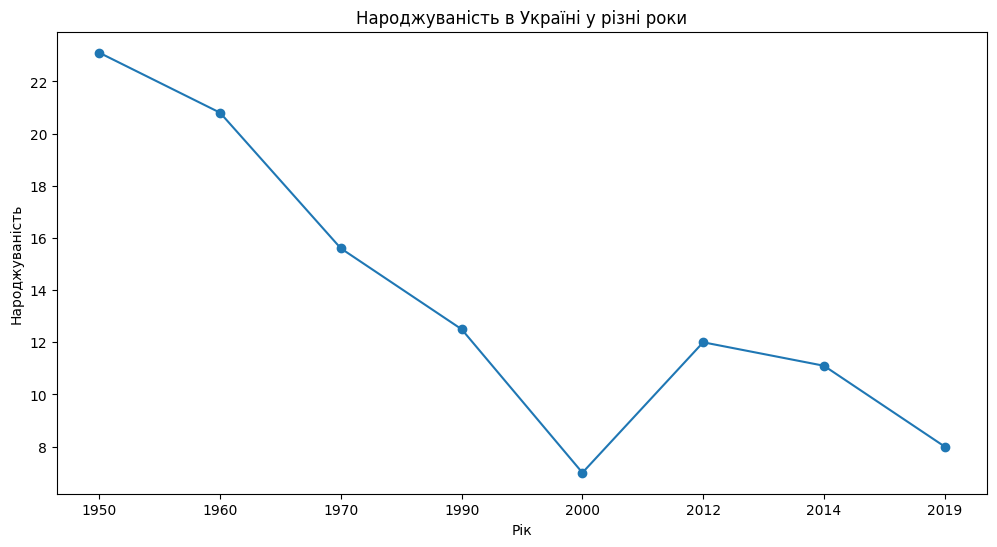

In [102]:
plt.figure(figsize=(12, 6))
df_numeric.loc[df_numeric.index[-1], '1950':'2019'].plot(kind='line', marker='o')
plt.title('Народжуваність в Україні у різні роки')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.show()